### Plotting signals

Hopefully, based on the principles of the framework, `.plot` should be available to all the subclasses. 

In [1]:
from modusa.generators import AudioWaveformGenerator # Using this to generate audio signal for testing

In [3]:
signal1 = AudioWaveformGenerator.generate_sinusoid(A=1, f=5, phi=0, sr=100, duration=5)
signal1.title = "Sinusoid 1"

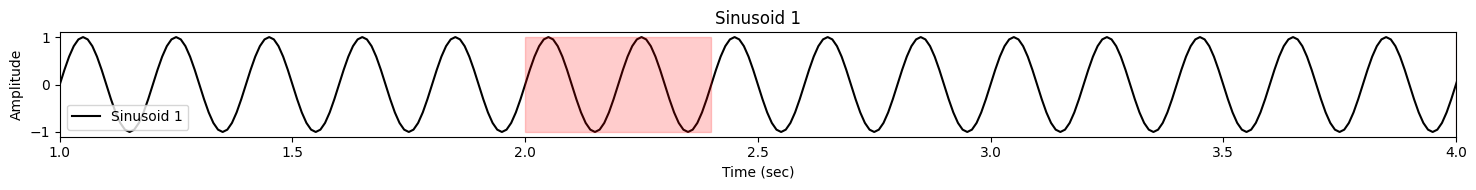

In [4]:
signal1.plot(xlim=(1, 4), color="k", legend_loc="lower left", highlight=[(2, 2.4), (4, 4.1)])